# Portfolio 2 

- Student ID **45504865**
- Student Name **Smaran Giriprakash**

## Data Driven Prediction Models of Energy Use of Appliances in a Low-Energy House

## Predicting appliances's energy usage from observations 

In [28]:
import os 
import numpy as np 
import pandas as pd

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

# Source: https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
traindf = pd.read_csv('training.csv') 
testdf = pd.read_csv('testing.csv') 
df = pd.read_excel('Portfolio2.xlsx') 
print(traindf.shape)
print(testdf.shape)
print(df.shape)

(14803, 32)
(4932, 32)
(19735, 32)


In [30]:
df.columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

From the output we can see that columns date, WeekStatus and Day_of_week are the only categorical variables in the data and it is also evident that no column has null values in them. 

## Distribution of Energy Usage

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline 

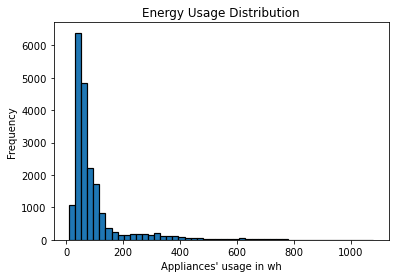

In [32]:
#Histogram
plt.hist(df.Appliances, bins = 50, edgecolor = 'black', linewidth = 1.2) 
plt.rcParams["figure.figsize"] = [16,10]
plt.title("Energy Usage Distribution") 
plt.xlabel("Appliances' usage in wh") 
plt.ylabel("Frequency") 
plt.show()

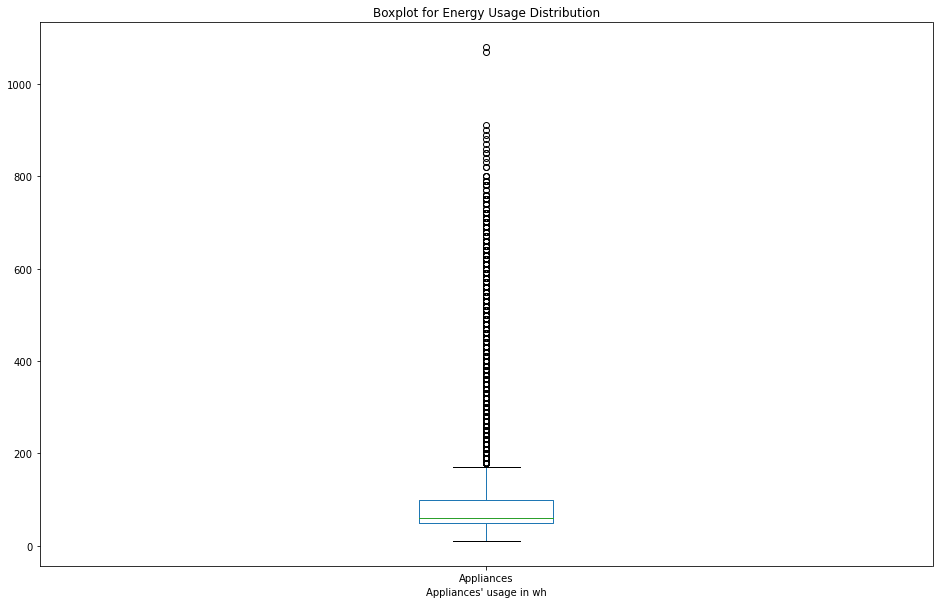

In [33]:
#Box Plot 
df.Appliances.plot.box() 
plt.title("Boxplot for Energy Usage Distribution") 
plt.xlabel("Appliances' usage in wh")
plt.show()

In [54]:
# Pair Grid plot 
from scipy import stats 
import seaborn as sns

def disp_pearson(x, y, **kws): 
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca() 
    ax.annotate(pearson, [.5,.5], xycoords = "axes fraction", ha = "center", va = 'center', fontsize = 30)


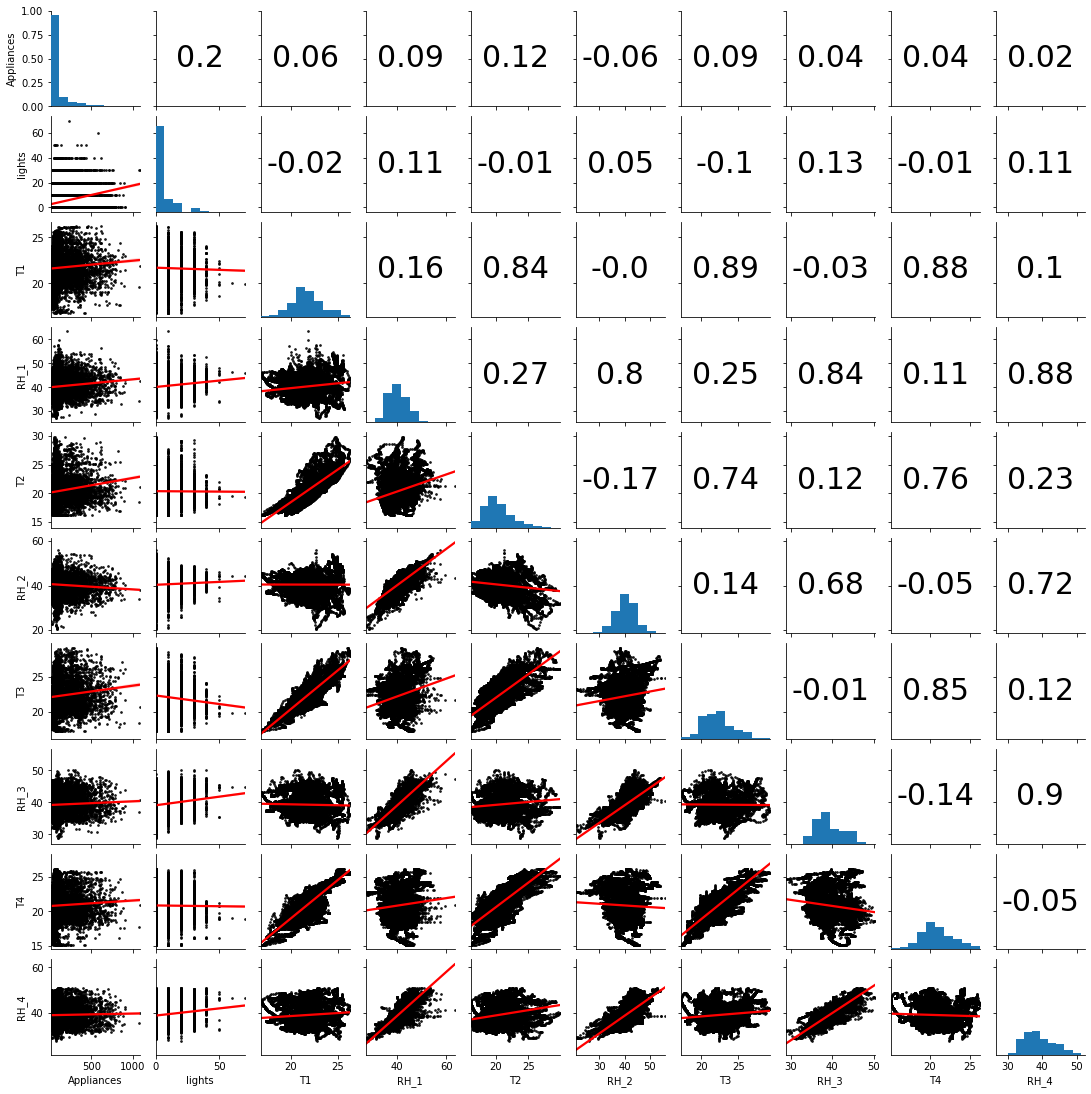

In [61]:
scatterdata = df[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3','T4', 'RH_4']]

s = sns.PairGrid(scatterdata, height = 1.5)  
s = s.map_diag(plt.hist) 
s = s.map_lower(sns.regplot, color = 'k', scatter_kws= {'s':3}, line_kws={'color' :'r'}) 
s = s.map_upper(disp_pearson) 


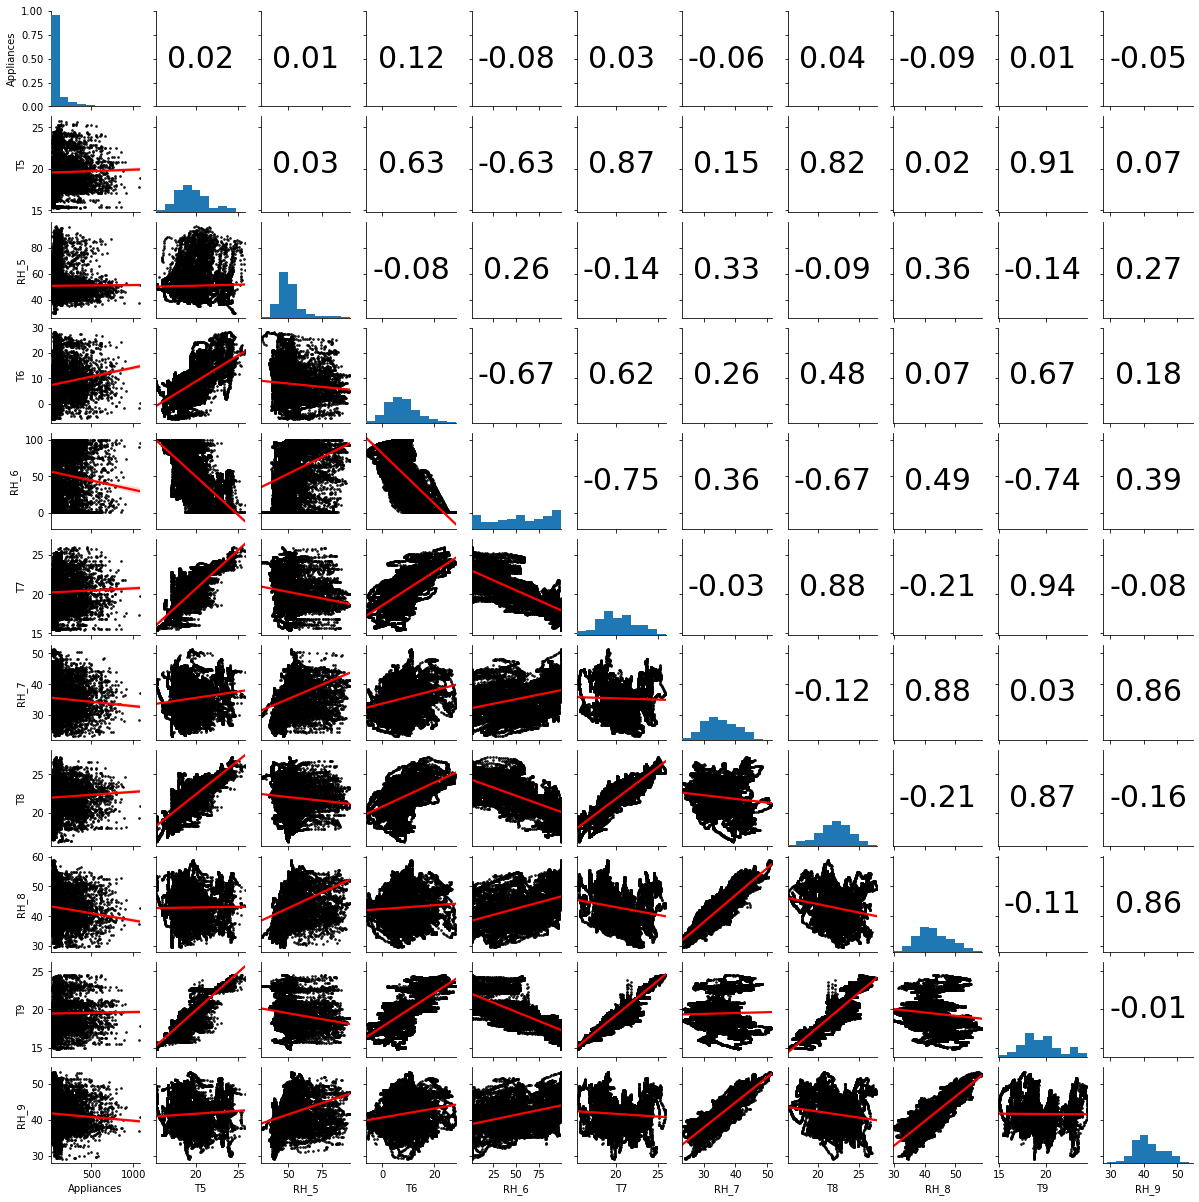

In [160]:
scatterdata2 = df[['Appliances', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7','T8', 'RH_8', 'T9', 'RH_9']]

s = sns.PairGrid(scatterdata2, height = 1.5)  
s = s.map_diag(plt.hist) 
s = s.map_lower(sns.regplot, color = 'k', scatter_kws= {'s':3}, line_kws={'color' :'r'}) 
s = s.map_upper(disp_pearson) 

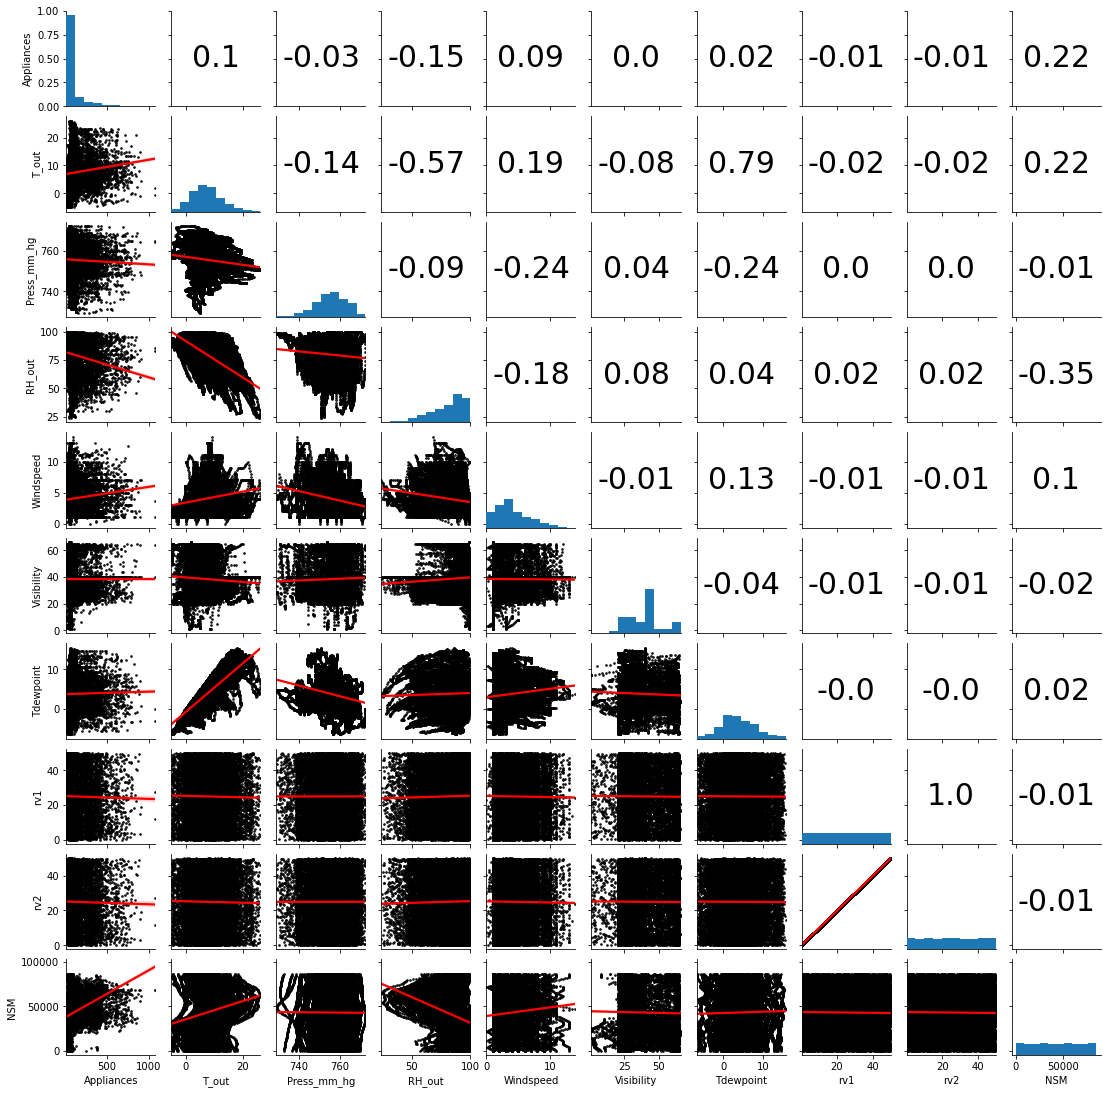

In [161]:
scatterdata3 = df[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint','rv1', 'rv2', 'NSM']]

s = sns.PairGrid(scatterdata3, height = 1.5)  
s = s.map_diag(plt.hist) 
s = s.map_lower(sns.regplot, color = 'k', scatter_kws= {'s':3}, line_kws={'color' :'r'}) 
s = s.map_upper(disp_pearson) 

In [89]:
# Converting Categorical variables into dummy variables 
weekstatus_df = pd.get_dummies(df['WeekStatus'])
weekstatus_df.head() 


,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [104]:
dayofweek_df = pd.get_dummies(df['Day_of_week']) 
dayofweek_df.head(5)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [91]:
# combining converted variables into original dataframe 
combined_df1 = df.join(weekstatus_df)
combined_df1.shape 

(19735, 34)

In [92]:
final_df = combined_df1.join(dayofweek_df) 
print(final_df.shape)
print(final_df.head())

(19735, 41)
                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  Day_of_week  Weekday  Weekend  Friday  \
0  19.79  44.730000  19.000000  ...       Monday        1        0       0   
1  19.79  44.790000  19.000000  ...       Monday        1        0       0   
2  19.79  44.933333  18.926667  ...       Monday        1        0       0   
3  19.79  45.000000  18.890000  ...       Monday        1        0       0   
4  19.79  45.000000  18.890000  ...       Monday        1        0       0   

   Monday  Saturday  Sunday  Thursday 

## Modelling using only Numeric Features

In [64]:
from sklearn.model_selection import train_test_split 

In [105]:
train, test = train_test_split(final_df, test_size = 0.25, random_state= 142) 
print(train.shape) 
print(test.shape)
train.head() 


(14801, 41)
(4934, 41)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Day_of_week,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
12647,2016-04-08 12:50:00,400,0,21.390000,44.026667,21.200000,42.245000,22.100000,39.693333,20.890000,...,Friday,1,0,1,0,0,0,0,0,0
829,2016-01-17 11:10:00,440,0,22.033333,39.193333,21.390000,37.390000,21.890000,41.230000,21.790000,...,Sunday,0,1,0,0,0,1,0,0,0
15761,2016-04-30 03:50:00,60,0,21.730000,37.200000,19.100000,40.000000,22.890000,37.090000,19.426667,...,Saturday,0,1,0,0,1,0,0,0,0
5750,2016-02-20 15:20:00,70,0,22.166667,40.433333,21.200000,40.000000,22.468571,40.295714,18.100000,...,Saturday,0,1,0,0,1,0,0,0,0
6720,2016-02-27 09:00:00,90,0,19.666667,37.600000,17.856667,38.663333,20.290000,37.163333,20.290000,...,Saturday,0,1,0,0,1,0,0,0,0


In [106]:
# Getting data and labels for training and testing 
X_train = train.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Weekday', 'Weekend'], axis = 1)
y_train = train['Appliances']
X_test = test.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Weekday', 'Weekend'], axis = 1)
y_test = test['Appliances'] 
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(14801, 28)
(14801,)
(4934, 28)
(4934,)


In [107]:
#Model Initialization 
model1 = LinearRegression() 

#Model training  
model1.fit(X_train, y_train) 

# predicting and training and testing data 
y_train_hat = model1.predict(X_train) 
y_test_hat = model1.predict(X_test) 

#Calculating Scores on Training and Testing sets using standard regression matrix 
print("Scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat))) 
print("R2: ", r2_score(y_train, y_train_hat)) 
print("MAE: ", mean_absolute_error(y_train, y_train_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print() 
print("Scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat))) 
print("R2: ", r2_score(y_test, y_test_hat)) 
print("MAE: ", mean_absolute_error(y_test, y_test_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))


Scores on training set: 
RMSE:  93.14373185588713
R2:  0.1719222437802599
MAE:  52.86913986005162
MAPE: 60.65461655038252

Scores on testing set: 
RMSE:  94.89068237695837
R2:  0.1515267684334104
MAE:  52.930525195709656
MAPE: 61.510368263978854


## Modelling using numeric + Weekday features

In [108]:
# Getting data and labels for trainning and testing 
X_train = train.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis = 1)
y_train = train['Appliances']
X_test = test.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis = 1)
y_test = test['Appliances'] 
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(14801, 30)
(14801,)
(4934, 30)
(4934,)


In [109]:
#Model Initialization 
model2 = LinearRegression() 

#Model training  
model2.fit(X_train, y_train) 

# predicting and training and testing data 
y_train_hat = model2.predict(X_train) 
y_test_hat = model2.predict(X_test) 

#Calculating Scores on Training and Testing sets using standard regression matrix 
print("Scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat))) 
print("R2: ", r2_score(y_train, y_train_hat)) 
print("MAE: ", mean_absolute_error(y_train, y_train_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print() 
print("Scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat))) 
print("R2: ", r2_score(y_test, y_test_hat)) 
print("MAE: ", mean_absolute_error(y_test, y_test_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))


Scores on training set: 
RMSE:  93.08458751875855
R2:  0.17297353428795492
MAE:  52.83970349684019
MAPE: 60.54607047889806

Scores on testing set: 
RMSE:  94.84603767564464
R2:  0.15232496952310215
MAE:  52.93950837006735
MAPE: 61.43230493830531


## Modelling using numeric + Days of Week Features


In [114]:
# Getting data and labels for trainning and testing 
X_train = train.drop(['date', 'Appliances', 'Day_of_week', 'WeekStatus', 'Weekday', 'Weekend'], axis = 1)
y_train = train['Appliances']
X_test = test.drop(['date', 'Appliances', 'Day_of_week', 'WeekStatus', 'Weekday', 'Weekend'], axis = 1)
y_test = test['Appliances'] 
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(14801, 35)
(14801,)
(4934, 35)
(4934,)


In [115]:
#Model Initialization 
model3 = LinearRegression() 

#Model training  
model3.fit(X_train, y_train) 

# predicting and training and testing data 
y_train_hat = model3.predict(X_train) 
y_test_hat = model3.predict(X_test) 

#Calculating Scores on Training and Testing sets using standard regression matrix 
print("Scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat))) 
print("R2: ", r2_score(y_train, y_train_hat)) 
print("MAE: ", mean_absolute_error(y_train, y_train_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print() 
print("Scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat))) 
print("R2: ", r2_score(y_test, y_test_hat)) 
print("MAE: ", mean_absolute_error(y_test, y_test_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))

Scores on training set: 
RMSE:  92.77810660783693
R2:  0.17841053648206817
MAE:  52.78136343892407
MAPE: 60.59366997435808

Scores on testing set: 
RMSE:  94.49178554874354
R2:  0.15864531549681393
MAE:  52.78159530152494
MAPE: 61.23721451102695


## Modelling using All features 

In [116]:
# Getting data and labels for trainning and testing 
X_train = train.drop(['date', 'Appliances', 'Day_of_week', 'WeekStatus'], axis = 1)
y_train = train['Appliances']
X_test = test.drop(['date', 'Appliances', 'Day_of_week', 'WeekStatus'], axis = 1)
y_test = test['Appliances'] 
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(14801, 37)
(14801,)
(4934, 37)
(4934,)


In [117]:
#Model Initialization 
model4 = LinearRegression() 

#Model training  
model4.fit(X_train, y_train) 

# predicting and training and testing data 
y_train_hat = model4.predict(X_train) 
y_test_hat = model4.predict(X_test) 

#Calculating Scores on Training and Testing sets using standard regression matrix 
print("Scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat))) 
print("R2: ", r2_score(y_train, y_train_hat)) 
print("MAE: ", mean_absolute_error(y_train, y_train_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print() 
print("Scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat))) 
print("R2: ", r2_score(y_test, y_test_hat)) 
print("MAE: ", mean_absolute_error(y_test, y_test_hat)) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))

Scores on training set: 
RMSE:  92.77810660783692
R2:  0.17841053648206828
MAE:  52.781363438930924
MAPE: 60.59366997438036

Scores on testing set: 
RMSE:  94.4917855487436
R2:  0.15864531549681304
MAE:  52.781595301532704
MAPE: 61.2372145110512


## Residual Plot

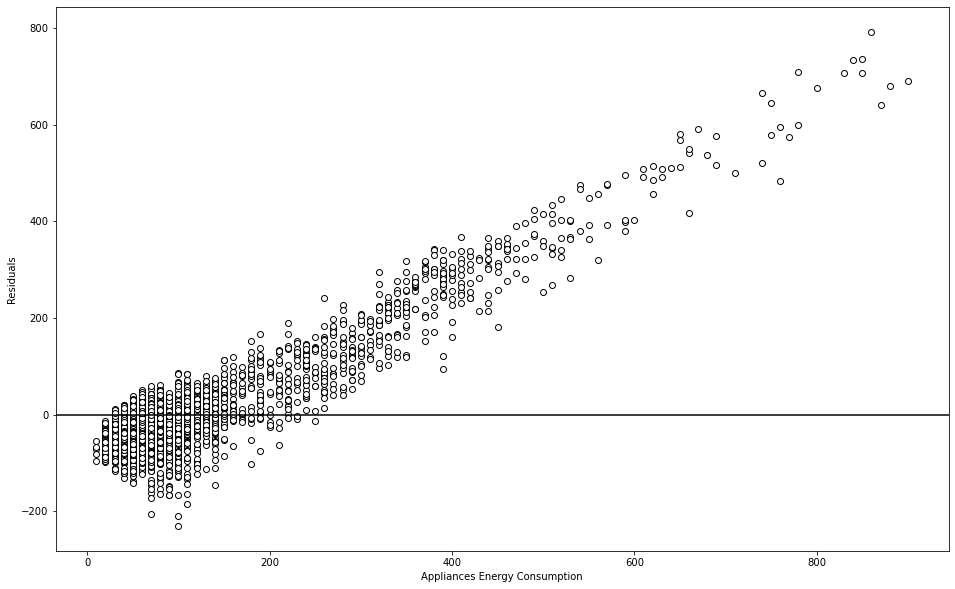

In [118]:
residual = y_test.values-y_test_hat 
plt.scatter(y_test, residual, color = "white", edgecolor = 'black') 
plt.xlabel('Appliances Energy Consumption') 
plt.ylabel('Residuals') 
plt.axhline(0, color = 'black')

## Feature Importance using RFE 

In [123]:
from sklearn.feature_selection import RFE 

In [126]:
estimator = LinearRegression() 
rmse_scores = [] 
for i in range(1,38):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train) 
    y_test_pred = selector.predict(X_test)  
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    print("RMSE score on test set using, ", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)



RMSE score on test set using,  1 features:  102.80413642932918
RMSE score on test set using,  2 features:  100.84038118582777
RMSE score on test set using,  3 features:  100.68072752171365
RMSE score on test set using,  4 features:  98.81097455109749
RMSE score on test set using,  5 features:  98.686809145086
RMSE score on test set using,  6 features:  98.57273968780272
RMSE score on test set using,  7 features:  98.47003272547168
RMSE score on test set using,  8 features:  98.3002597368674
RMSE score on test set using,  9 features:  97.79893355833191
RMSE score on test set using,  10 features:  96.06888715773073
RMSE score on test set using,  11 features:  96.01990341858165
RMSE score on test set using,  12 features:  95.7641381457778
RMSE score on test set using,  13 features:  95.57333272059151
RMSE score on test set using,  14 features:  95.56779667737113
RMSE score on test set using,  15 features:  95.54476489714978
RMSE score on test set using,  16 features:  95.54828872021723
RM

In [127]:
rmse_scores

[102.80413642932918,
 100.84038118582777,
 100.68072752171365,
 98.81097455109749,
 98.686809145086,
 98.57273968780272,
 98.47003272547168,
 98.3002597368674,
 97.79893355833191,
 96.06888715773073,
 96.01990341858165,
 95.7641381457778,
 95.57333272059151,
 95.56779667737113,
 95.54476489714978,
 95.54828872021723,
 95.54828872021723,
 95.54828872021723,
 95.54828872021723,
 95.54089390673828,
 94.74183075945908,
 94.68895216342734,
 94.73315558645837,
 94.76788702814545,
 94.77170900808942,
 94.77672539070272,
 94.78250178847294,
 94.76882106739437,
 94.75807261465901,
 94.71267780137191,
 94.71572222497056,
 94.6603691425692,
 94.68827674785076,
 94.68029732097284,
 94.67247436522348,
 94.67247436522348,
 94.4917855487436]

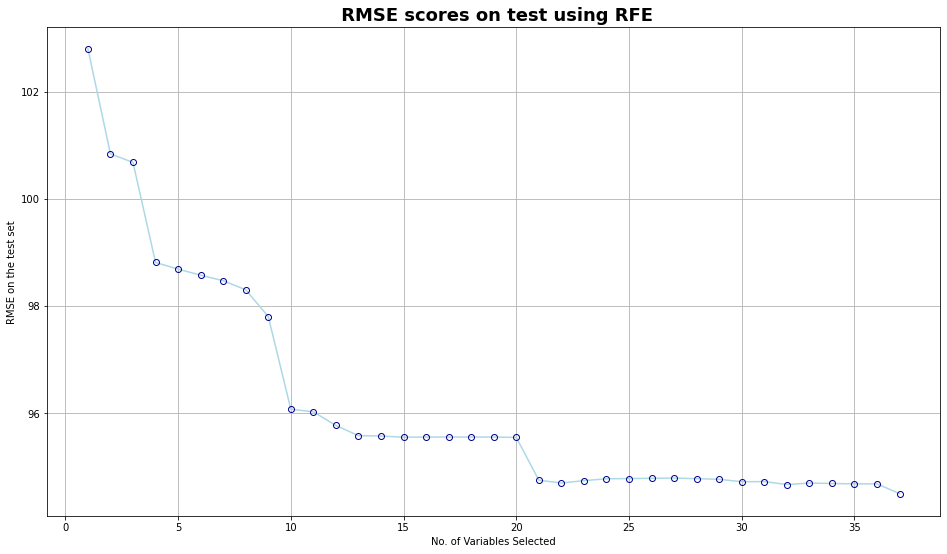

In [129]:
plt.figure(figsize=(16,9)) 
plt.grid() 
plt.xlabel('No. of Variables Selected') 
plt.ylabel('RMSE on the test set') 
plt.title(' RMSE scores on test using RFE', fontsize = 18, fontweight = 'bold')
plt.plot(range(1,38), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1, markeredgecolor = 'Darkblue', markerfacecolor = 'none')
plt.show()

In [152]:
# RFECV 
from sklearn.model_selection import StratifiedKFold 
from sklearn.feature_selection import RFECV 
model = LinearRegression() 
k = StratifiedKFold(n_splits = 10, random_state = 42) 
rfecv = RFECV(estimator=model, step=1, cv = k, scoring = 'neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [154]:
# Optimal Number of Features
print('Optimal Number of features: ', rfecv.n_features_)
print('Best Features: ', X_train.columns[rfecv.support_])

Optimal Number of features:  37
Best Features:  Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'Weekday', 'Weekend', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


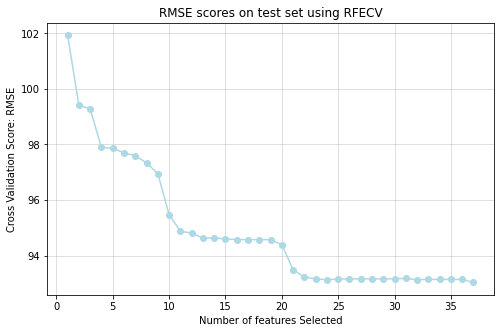

In [158]:
#Plot number of features vs. cross-validation scores RMSE 
plt.figure(figsize=(8,5)) 
plt.xlabel("Number of features Selected") 
plt.ylabel("Cross Validation Score: RMSE") 
plt.title("RMSE scores on test set using RFECV") 

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_) 

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker = 'o', color='lightblue')
plt.grid(alpha=0.5)
plt.show()
